Nama : Zulfikri

Email : zulfikri263@gmail.com

Alamat : Jalan Mustafa Yatim, Kota Pekanbaru, Riau

**Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series**

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Metode Numerik/fetal_ecg.txt', delimiter='\t')

df

,x,y
0,0.000,28.800
1,0.001,26.700
2,0.002,24.800
3,0.003,23.800
4,0.004,23.600
...,...,...
9995,9.995,75.901
9996,9.996,85.901
9997,9.997,91.401
9998,9.998,91.301


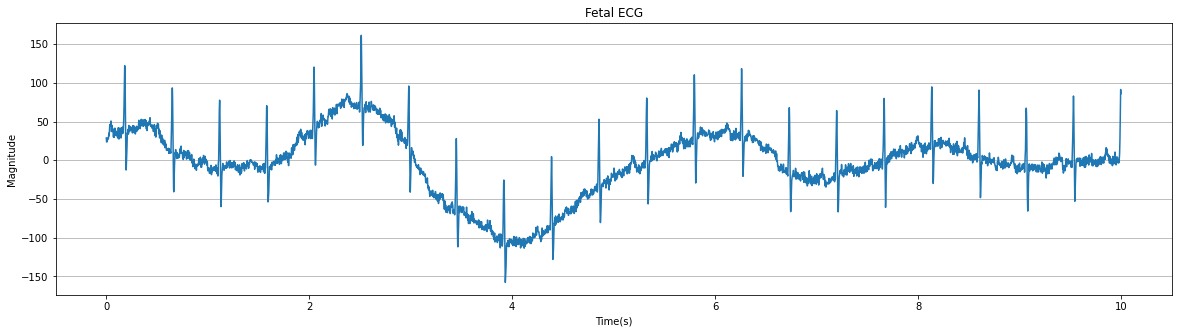

In [4]:
import matplotlib.pyplot as plt

no = df['x'].values
val  = df['y'].values

plt.figure(figsize=(20,5))
plt.plot(no, val)
plt.title('Fetal ECG')
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.grid(axis='y')
plt.show()

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

val_latih, val_test, no_latih, no_test = train_test_split(val, no, test_size=0.2, shuffle=False)

print(len(no_latih), len(no_test), len(val_latih), len(val_test))

8000 2000 8000 2000


In [7]:
max = df['y'].max()
min = df['y'].min()

mae = (max-min)*0.1

print(mae)

31.930400000000006


In [9]:
train_set = windowed_dataset(val_latih, window_size=60, batch_size=128, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])
"""
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<mae):
      print("mae <10% of data DONE!!")
      self.model.stop_training = True
callbacks = myCallback()
"""

'\nclass myCallback(tf.keras.callbacks.Callback):\n  def on_epoch_end(self, epoch, logs={}):\n    if(logs.get(\'mae\')<mae):\n      print("mae <10% of data DONE!!")\n      self.model.stop_training = True\ncallbacks = myCallback()\n'

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=50)

Epoch 1/50
63/63 [==============================] - 11s 23ms/step - loss: 30.9424 - mae: 31.4357
Epoch 2/50
63/63 [==============================] - 2s 22ms/step - loss: 20.0706 - mae: 20.5516
Epoch 3/50
63/63 [==============================] - 2s 22ms/step - loss: 8.5076 - mae: 8.9681
Epoch 4/50
63/63 [==============================] - 2s 23ms/step - loss: 2.8917 - mae: 3.3099
Epoch 5/50
63/63 [==============================] - 2s 23ms/step - loss: 1.6001 - mae: 2.0080
Epoch 6/50
63/63 [==============================] - 2s 23ms/step - loss: 1.5204 - mae: 1.9134
Epoch 7/50
63/63 [==============================] - 2s 23ms/step - loss: 0.9712 - mae: 1.3129
Epoch 8/50
63/63 [==============================] - 2s 22ms/step - loss: 0.7406 - mae: 1.0672
Epoch 9/50
63/63 [==============================] - 2s 23ms/step - loss: 0.6280 - mae: 0.9474
Epoch 10/50
63/63 [==============================] - 2s 23ms/step - loss: 0.5366 - mae: 0.8484
Epoch 11/50
63/63 [==============================] - 2